In [66]:
# set up libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

In [8]:
road_crash = pd.read_csv("data/ACT_Road_Crash_Data.csv")

In [9]:
road_crash

,CRASH_ID,CRASH_DATE,CRASH_TIME,SUBURB_LOCATION,LONGITUDE,LATITUDE,INTERSECTION,MIDBLOCK,CRASH_DIRECTION,CRASH_TYPE,CRASH_SEVERITY,LIGHTING_CONDITION,ROAD_CONDITION,WEATHER_CONDITION,Location
0,1025691,13/01/2012,09:18,KAMBAH,149.055056,-35.392007,NO,YES,East bound,Struck object (Off Road),Injury,Daylight,Good dry surface,Fine,"(-35.392006654135606, 149.05505612950844)"
1,1039779,05/04/2012,17:30,PHILLIP,149.084447,-35.348921,YES,NO,West bound,Struck pedestrian (On Road),Injury,Daylight,Good dry surface,Fine,"(-35.34892137433122, 149.0844465057644)"
2,1048742,28/10/2012,11:48,HALL,149.061431,-35.172863,NO,YES,South bound,Struck object (Off Road),Injury,Daylight,Good dry surface,Fine,"(-35.172862707340954, 149.0614313347401)"
3,1041937,07/08/2012,17:00,BELCONNEN,149.094072,-35.201315,YES,NO,North bound,Rear end collision,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.201315499751615, 149.09407196860244)"
4,1048339,01/11/2012,14:45,HARRISON,149.156400,-35.197308,YES,NO,South bound,Rear end collision,Injury,Daylight,Good dry surface,Fine,"(-35.19730828458103, 149.15639997910796)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71791,1052228,06/12/2012,15:45,CRACE,149.062673,-35.208634,NO,YES,South / West bound,Other - Vehicle to Vehicle,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)"
71792,1225463,16/03/2020,07:45,RURAL - BELCONNEN,149.062673,-35.208634,NO,YES,East bound,Struck animal (not ridden On Road),Property Damage Only,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)"
71793,1243579,05/04/2021,10:25,RED HILL,149.131318,-35.341376,NO,YES,Unknown,Other - Vehicle to Vehicle,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.34137565927604, 149.1313181181877)"
71794,1247671,19/05/2021,17:31,GUNGAHLIN,149.129269,-35.182638,YES,NO,North bound,Rear end collision,Property Damage Only,Dark - good street lighting,Good dry surface,Fine,"(-35.182638434932166, 149.12926943569062)"


In [10]:
road_crash.describe()

,CRASH_ID,LONGITUDE,LATITUDE
count,7.179600e+04,71796.000000,71796.000000
mean,1.139925e+06,149.107456,-35.293471
std,6.471786e+04,0.041153,0.071927
min,1.024965e+06,148.787789,-35.891146
25%,1.084076e+06,149.075973,-35.341430
50%,1.139946e+06,149.111019,-35.286937
75%,1.196036e+06,149.135042,-35.239150
max,1.251657e+06,149.396211,-35.143293


In [15]:
road_crash['CRASH_DATE']

0        13/01/2012
1        05/04/2012
2        28/10/2012
3        07/08/2012
4        01/11/2012
            ...    
71791    06/12/2012
71792    16/03/2020
71793    05/04/2021
71794    19/05/2021
71795    25/06/2016
Name: CRASH_DATE, Length: 71796, dtype: object

In [16]:
# convert CRASH_DATE to CRASH_DAY, CRASH_MONTH, CRASH_YEAR ?
# or include CRASH_TIME and convert to datetime format ?

In [60]:
road_crash["CRASH_DATE"] = pd.to_datetime(road_crash["CRASH_DATE"], 
 format = "%d/%m/%Y", 
 errors = "coerce")

In [61]:
road_crash['CRASH_DATE']

0       2012-01-13
1       2012-04-05
2       2012-10-28
3       2012-08-07
4       2012-11-01
           ...    
71791   2012-12-06
71792   2020-03-16
71793   2021-04-05
71794   2021-05-19
71795   2016-06-25
Name: CRASH_DATE, Length: 71796, dtype: datetime64[ns]

In [77]:
road_crash["CRASH_TIME"] = pd.to_datetime(road_crash["CRASH_TIME"], 
 format = "%H:%M", 
 errors = "coerce")

In [78]:
road_crash["CRASH_DATE_month"] = road_crash["CRASH_DATE"].dt.month
road_crash["CRASH_DATE_week"] = road_crash["CRASH_DATE"].dt.isocalendar().week
road_crash["CRASH_DATE_day"] = road_crash["CRASH_DATE"].dt.day
road_crash["CRASH_DATE_dayofweek"] = road_crash["CRASH_DATE"].dt.dayofweek
road_crash["CRASH_TIME_hour"] = road_crash["CRASH_TIME"].dt.hour

In [79]:
road_crash

,CRASH_ID,CRASH_DATE,CRASH_TIME,SUBURB_LOCATION,LONGITUDE,LATITUDE,INTERSECTION,MIDBLOCK,CRASH_DIRECTION,CRASH_TYPE,CRASH_SEVERITY,LIGHTING_CONDITION,ROAD_CONDITION,WEATHER_CONDITION,Location,CRASH_DATE_month,CRASH_DATE_week,CRASH_DATE_day,CRASH_DATE_dayofweek,CRASH_TIME_hour
0,1025691,2012-01-13,1900-01-01 09:18:00,KAMBAH,149.055056,-35.392007,NO,YES,East bound,Struck object (Off Road),Injury,Daylight,Good dry surface,Fine,"(-35.392006654135606, 149.05505612950844)",1,2,13,4,9
1,1039779,2012-04-05,1900-01-01 17:30:00,PHILLIP,149.084447,-35.348921,YES,NO,West bound,Struck pedestrian (On Road),Injury,Daylight,Good dry surface,Fine,"(-35.34892137433122, 149.0844465057644)",4,14,5,3,17
2,1048742,2012-10-28,1900-01-01 11:48:00,HALL,149.061431,-35.172863,NO,YES,South bound,Struck object (Off Road),Injury,Daylight,Good dry surface,Fine,"(-35.172862707340954, 149.0614313347401)",10,43,28,6,11
3,1041937,2012-08-07,1900-01-01 17:00:00,BELCONNEN,149.094072,-35.201315,YES,NO,North bound,Rear end collision,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.201315499751615, 149.09407196860244)",8,32,7,1,17
4,1048339,2012-11-01,1900-01-01 14:45:00,HARRISON,149.156400,-35.197308,YES,NO,South bound,Rear end collision,Injury,Daylight,Good dry surface,Fine,"(-35.19730828458103, 149.15639997910796)",11,44,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71791,1052228,2012-12-06,1900-01-01 15:45:00,CRACE,149.062673,-35.208634,NO,YES,South / West bound,Other - Vehicle to Vehicle,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)",12,49,6,3,15
71792,1225463,2020-03-16,1900-01-01 07:45:00,RURAL - BELCONNEN,149.062673,-35.208634,NO,YES,East bound,Struck animal (not ridden On Road),Property Damage Only,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)",3,12,16,0,7
71793,1243579,2021-04-05,1900-01-01 10:25:00,RED HILL,149.131318,-35.341376,NO,YES,Unknown,Other - Vehicle to Vehicle,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.34137565927604, 149.1313181181877)",4,14,5,0,10
71794,1247671,2021-05-19,1900-01-01 17:31:00,GUNGAHLIN,149.129269,-35.182638,YES,NO,North bound,Rear end collision,Property Damage Only,Dark - good street lighting,Good dry surface,Fine,"(-35.182638434932166, 149.12926943569062)",5,20,19,2,17


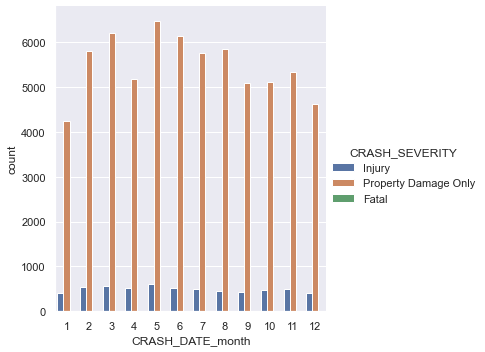

In [67]:
sns.catplot(data=road_crash, x="CRASH_DATE_month", kind="count", hue="CRASH_SEVERITY")

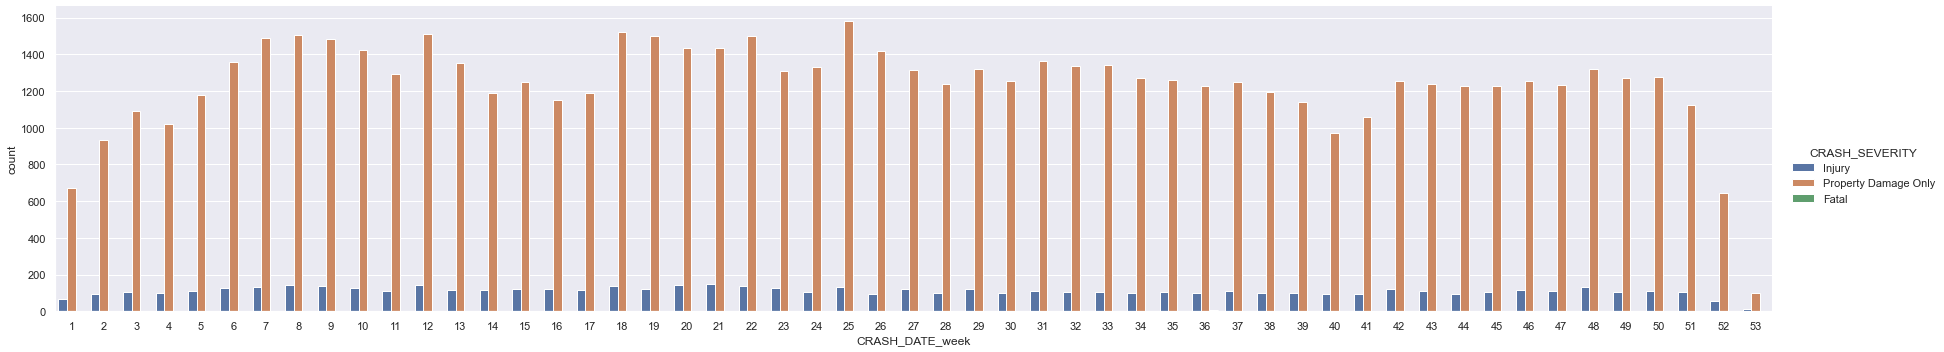

In [85]:
sns.catplot(data=road_crash, x="CRASH_DATE_week", kind="count", hue="CRASH_SEVERITY", aspect=5)

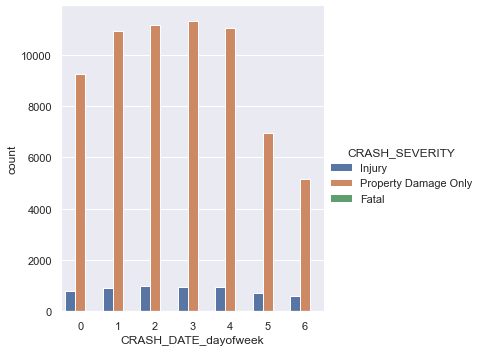

In [76]:
sns.catplot(data=road_crash, x="CRASH_DATE_dayofweek", kind="count", hue="CRASH_SEVERITY")

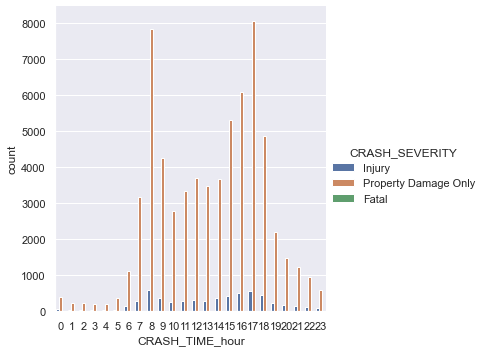

In [84]:
sns.catplot(data=road_crash, x="CRASH_TIME_hour", kind="count", hue="CRASH_SEVERITY")

In [21]:
road_crash['SUBURB_LOCATION'].unique()

array(['KAMBAH', 'PHILLIP', 'HALL', 'BELCONNEN', 'HARRISON', 'MAWSON',
       'PALMERSTON', 'PARKES', 'WANNIASSA', 'GREENWAY', 'WATSON',
       'WESTON', 'BRUCE', 'SYMONSTON', 'NARRABUNDAH', 'DICKSON', 'LATHAM',
       'HOLDER', 'CURTIN', 'RURAL - JERRABOMBERRA', 'FYSHWICK',
       'GRIFFITH', 'LAWSON', 'BONYTHON', 'GOWRIE', 'RURAL - BELCONNEN',
       'LYNEHAM', 'HUME', 'O"MALLEY', 'NICHOLLS', 'ACTON', 'RICHARDSON',
       'BRADDON', 'RURAL - KOWEN', 'CITY', 'AINSLIE', 'RURAL - BOOTH',
       'DEAKIN', 'HIGGINS', 'BEARD', 'MITCHELL', 'RUSSELL', 'CHIFLEY',
       'NGUNNAWAL', 'MONASH', 'BARTON', 'REID', 'GORDON', 'HUGHES',
       'CALWELL', 'CASEY', 'RURAL - MAJURA', 'O"CONNOR', 'RIVETT',
       'THARWA', 'CHAPMAN', 'DOWNER', 'GUNGAHLIN', 'CHARNWOOD', 'LYONS',
       'ISABELLA PLAINS', 'RED HILL', 'TURNER', 'PEARCE', 'WRIGHT',
       'RURAL - GUNGAHLIN', 'RURAL - MOLONGLO VALLEY', 'KALEEN', 'ARANDA',
       'CONDER', 'CHISHOLM', 'GARRAN', 'RURAL - COTTER', 'SPENCE',
       'FORREST', '

In [106]:
road_crash['SUBURB_LOCATION'].value_counts()

CITY                        3203
BELCONNEN                   2762
GUNGAHLIN                   2728
PARKES                      2206
PHILLIP                     2183
                            ... 
RURAL - MOUNT CLEAR           11
RURAL - RENDEZVOUS CREEK      10
RURAL - HALL                   8
URIARRA VILLAGE                3
KENNY                          2
Name: SUBURB_LOCATION, Length: 136, dtype: int64

In [107]:
road_crash['SUBURB_LOCATION'].value_counts().describe()

count     136.000000
mean      527.661765
std       596.844197
min         2.000000
25%       150.750000
50%       322.000000
75%       655.000000
max      3203.000000
Name: SUBURB_LOCATION, dtype: float64

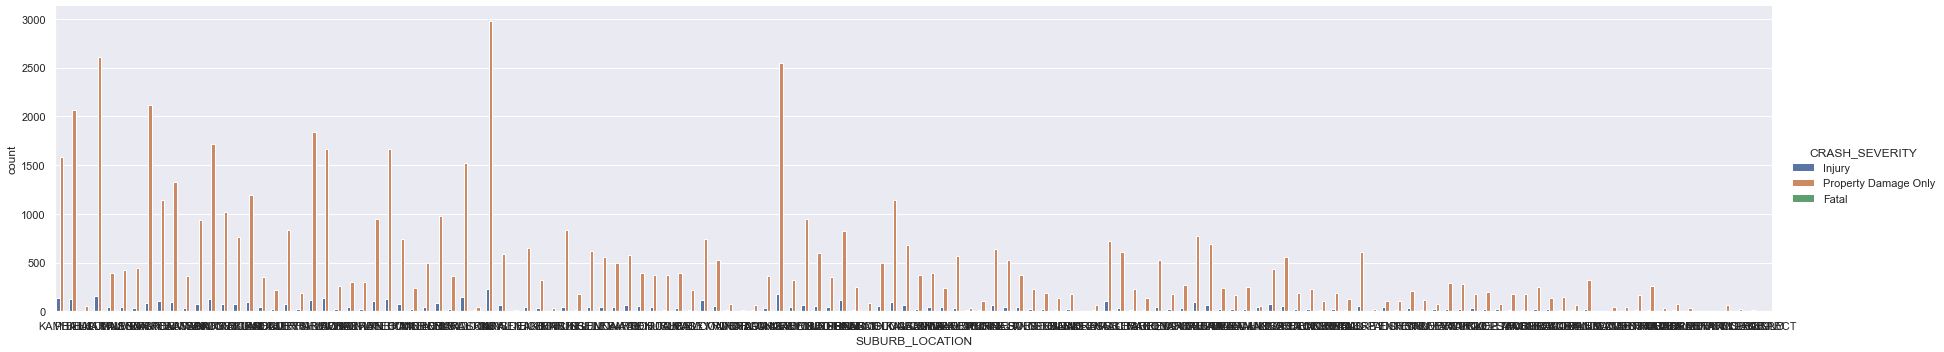

In [101]:
sns.catplot(data=road_crash, x="SUBURB_LOCATION", kind="count", hue="CRASH_SEVERITY", aspect=5)

In [22]:
# convert SUBURB_LOCATION to list of 0s and 1s
# one-hot encoding

In [24]:
# for longitude and latitude / location,
# get difference to nearest traffic speed camera?
# from Traffic_speed_camera_locations.csv

In [25]:
# check if INTERSECTION and MIDBLOCK are opposites;
# use bool data type?

In [53]:
road_crash['INTERSECTION'].value_counts()

YES    39251
NO     32545
Name: INTERSECTION, dtype: int64

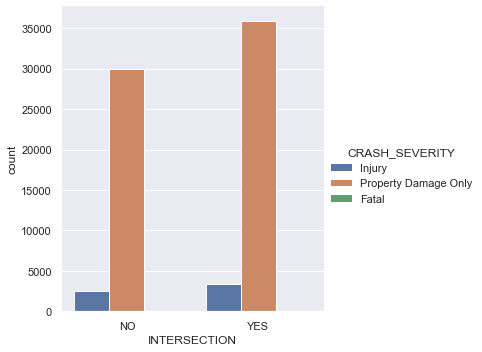

In [86]:
sns.catplot(data=road_crash, x="INTERSECTION", kind="count", hue="CRASH_SEVERITY")

In [54]:
road_crash['MIDBLOCK'].value_counts()

NO     39251
YES    32545
Name: MIDBLOCK, dtype: int64

In [26]:
road_crash['CRASH_DIRECTION'].unique()

array(['East bound', 'West bound', 'South bound', 'North bound',
       'South / West bound', 'North / East bound', 'East / South bound',
       'North / West bound', 'East / West bound', 'North / South bound',
       'Unknown', 'South bound / Unknown', 'West bound / Unknown',
       'North / South / West bound', 'North bound / Unknown',
       'East / South / West bound', 'East bound / Unknown',
       'North / East / South bound', 'North / East / West bound',
       'South / West bound / Unknown', 'East / South bound / Unknown',
       'North / South bound / Unknown',
       'North / East / West bound / Unknown',
       'East / West bound / Unknown', 'North / West bound / Unknown'],
      dtype=object)

In [27]:
road_crash['CRASH_DIRECTION'].value_counts()

South bound                            14602
North bound                            14440
West bound                             11299
East bound                             10984
North / East bound                      3562
North / West bound                      3522
South / West bound                      3462
East / South bound                      3459
North / South bound                     2581
East / West bound                       2454
Unknown                                  838
North bound / Unknown                    115
South bound / Unknown                     94
East bound / Unknown                      93
North / East / West bound                 66
West bound / Unknown                      57
North / South / West bound                54
East / South / West bound                 51
North / East / South bound                51
East / South bound / Unknown               4
South / West bound / Unknown               3
North / South bound / Unknown              2
North / Ea

In [108]:
road_crash['CRASH_DIRECTION'].value_counts().describe()

count       25.000000
mean      2871.840000
std       4683.018415
min          1.000000
25%         51.000000
50%         94.000000
75%       3462.000000
max      14602.000000
Name: CRASH_DIRECTION, dtype: float64

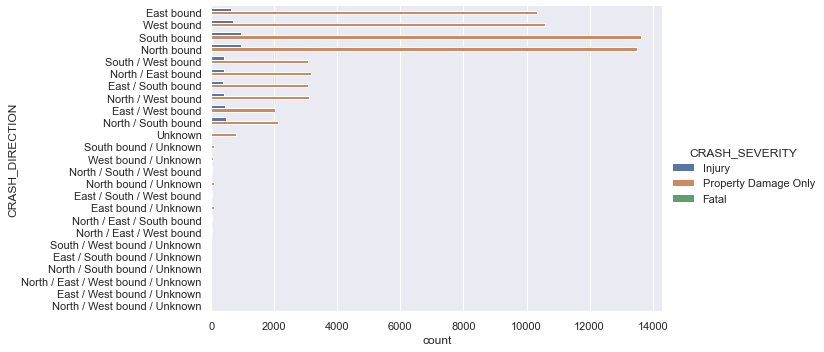

In [95]:
sns.catplot(data=road_crash, y="CRASH_DIRECTION", kind="count", hue="CRASH_SEVERITY", aspect=2)

In [28]:
road_crash['CRASH_TYPE'].unique()

array(['Struck object (Off Road)', 'Struck pedestrian (On Road)',
       'Rear end collision', 'Overturned (On Road)',
       'Right angle collision', 'Same direction side swipe',
       'Other - Vehicle to Vehicle', 'Overturned (Off Road)',
       'Other -  Single Vehicle (On Road)',
       'Right turn into oncoming vehicle',
       'Collision while one vehicle reversing',
       'Struck animal (not ridden On Road)',
       'Collision with parked vehicle', 'Struck object  (On Road)',
       'Head on collision', 'Opposite direction side swipe',
       'No object struck (Off Road)', 'Struck pedestrian (Off Road)',
       'Struck vehicle (Off Road)', 'Fall from moving vehicle (On Road)'],
      dtype=object)

In [30]:
road_crash['CRASH_TYPE'].value_counts()

Rear end collision                       31906
Right angle collision                     9947
Other - Vehicle to Vehicle                8227
Same direction side swipe                 6519
Struck object (Off Road)                  4663
Right turn into oncoming vehicle          3111
Collision with parked vehicle             1843
Struck animal (not ridden On Road)        1473
Collision while one vehicle reversing     1089
Overturned (On Road)                       683
Struck pedestrian (On Road)                474
Other -  Single Vehicle (On Road)          399
Head on collision                          358
Opposite direction side swipe              274
No object struck (Off Road)                237
Struck object  (On Road)                   226
Struck vehicle (Off Road)                  156
Overturned (Off Road)                      104
Struck pedestrian (Off Road)                79
Fall from moving vehicle (On Road)          28
Name: CRASH_TYPE, dtype: int64

In [109]:
road_crash['CRASH_TYPE'].value_counts().describe()

count       20.000000
mean      3589.800000
std       7286.470777
min         28.000000
25%        234.250000
50%        578.500000
75%       3499.000000
max      31906.000000
Name: CRASH_TYPE, dtype: float64

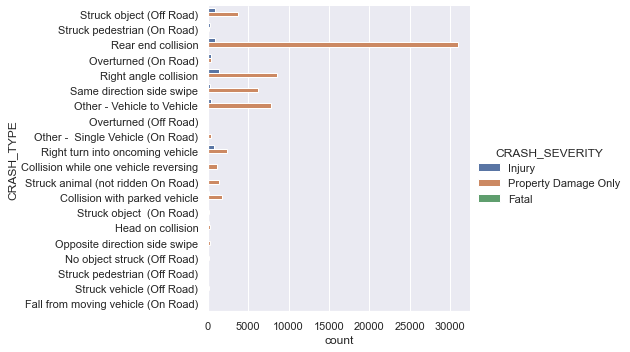

In [92]:
sns.catplot(data=road_crash, y="CRASH_TYPE", kind="count", hue="CRASH_SEVERITY", aspect=1.5)

In [45]:
road_crash['CRASH_SEVERITY'].value_counts()

Property Damage Only    65834
Injury                   5881
Fatal                      81
Name: CRASH_SEVERITY, dtype: int64

In [32]:
road_crash['LIGHTING_CONDITION'].value_counts()

Daylight                       55702
Dark - good street lighting     8973
Semi-darkness                   2950
Dark - poor street lighting     2830
Dark - no street lights         1330
Unknown                           11
Name: LIGHTING_CONDITION, dtype: int64

In [110]:
road_crash['LIGHTING_CONDITION'].value_counts().describe()

count        6.000000
mean     11966.000000
std      21645.309044
min         11.000000
25%       1705.000000
50%       2890.000000
75%       7467.250000
max      55702.000000
Name: LIGHTING_CONDITION, dtype: float64

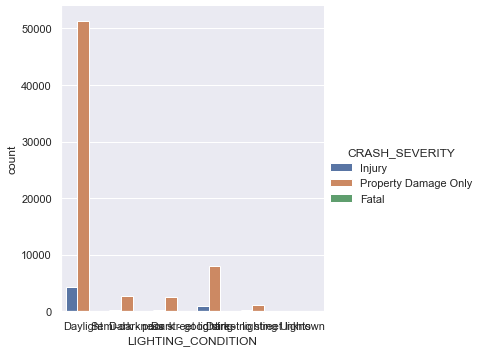

In [102]:
sns.catplot(data=road_crash, x="LIGHTING_CONDITION", kind="count", hue="CRASH_SEVERITY")

In [33]:
road_crash['ROAD_CONDITION'].value_counts()

Good dry surface         60924
Wet surface              10400
Loose surface              259
Muddy or oily surface      101
Snow or ice                 78
Unknown                     34
Name: ROAD_CONDITION, dtype: int64

In [111]:
road_crash['ROAD_CONDITION'].value_counts().describe()

count        6.000000
mean     11966.000000
std      24334.614696
min         34.000000
25%         83.750000
50%        180.000000
75%       7864.750000
max      60924.000000
Name: ROAD_CONDITION, dtype: float64

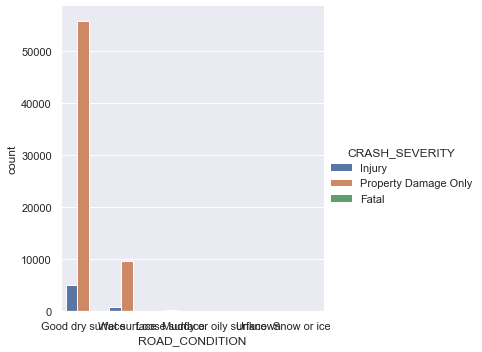

In [103]:
sns.catplot(data=road_crash, x="ROAD_CONDITION", kind="count", hue="CRASH_SEVERITY")

In [34]:
road_crash['WEATHER_CONDITION'].value_counts()

Fine                  59404
Light rain             6553
Cloudy or Overcast     3172
Heavy rain             1951
Fog                     505
Smoke or dust           128
Snow or sleet            41
Other                    25
Unknown                  17
Name: WEATHER_CONDITION, dtype: int64

In [112]:
road_crash['WEATHER_CONDITION'].value_counts().describe()

count        9.000000
mean      7977.333333
std      19407.403194
min         17.000000
25%         41.000000
50%        505.000000
75%       3172.000000
max      59404.000000
Name: WEATHER_CONDITION, dtype: float64

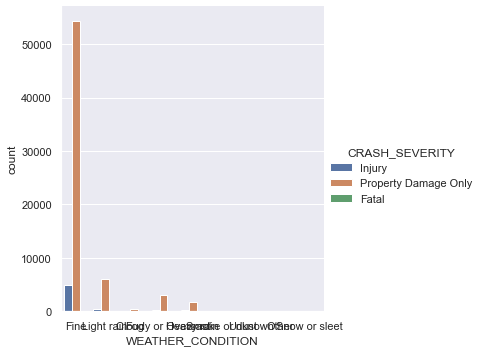

In [104]:
sns.catplot(data=road_crash, x="WEATHER_CONDITION", kind="count", hue="CRASH_SEVERITY")

In [35]:
# drop rows that have 'Unknown' or 'nan'?

In [38]:
speed_cameras = pd.read_csv("datasets/Traffic_speed_camera_locations.csv")

In [39]:
speed_cameras

,CAMERA TYPE,CAMERA LOCATION CODE,LOCATION_CODE,LATITUDE,LONGITUDE,LOCATION DESCRIPTION,Location,Decommissioned Camera_Date
0,MOBILE SPEED CAMERA,0286,0286A,-35.319037,149.139831,6 Eyre Street Kingston ACT 2604 Australia,"(-35.319037, 149.139831)",NaN
1,RED LIGHT AND SPEED CAMERA,1002,1002,-35.276100,149.129480,NORTHBOURNE AVENUE/BARRY DRIVE/COOYONG STREET,"(-35.2761, 149.12948)",NaN
2,MOBILE SPEED CAMERA,3072,3072A,-35.394284,149.096534,Langdon Ave Wanniassa ACT 2903 Australia,"(-35.394284, 149.096534)",NaN
3,RED LIGHT AND SPEED CAMERA,1006,1006,-35.247830,149.134120,NORTHBOURNE AVENUE/ANTILL STREET/MOUAT STREET,"(-35.24783, 149.13412)",NaN
4,MOBILE SPEED CAMERA,0283,0283B,-35.361179,149.077721,80 Macfarland Crescent Chifley ACT 2606 Australia,"(-35.361179, 149.077721)",NaN
...,...,...,...,...,...,...,...,...
1228,MOBILE SPEED CAMERA,4001B,4001B,-35.202706,149.096607,"Barton Hwy, Nicholls ACT 2913, Australia","(-35.202706, 149.096607)",Mar 2016
1229,MOBILE SPEED CAMERA,4004B,4004B,-35.204635,149.148050,"138 Flemington Rd, Harrison ACT 2914, Australia","(-35.204635, 149.14805)",Jan 2020
1230,MOBILE SPEED CAMERA,4002A,4002A,-35.197646,149.162917,"Horse Park Dr, Harrison ACT 2914, Australia","(-35.197646, 149.162917)",Jun 2017
1231,MOBILE SPEED CAMERA,4004C,4004C,-35.196372,149.150503,"224 Flemington Rd, Harrison ACT 2914, Australia","(-35.196372, 149.150503)",Jan 2020


In [36]:
speed_zones = pd.read_csv("datasets/ACT_Speed_Zones.csv")

In [37]:
speed_zones

,the_geom,ROAD_NAME,LINK_BETWE,SPEED_ZONE,IAL_MEANIN
0,MULTILINESTRING ((149.14658730303773 -35.23590...,"A""BECKETT ST.","A""BECKETT STREET (ADAMS -> McCAWLEY)",50,BOTH
1,MULTILINESTRING ((149.1066875110037 -35.364616...,YAMBA DR.,YAMBA DRIVE (JULIA FLYNN -> BEASLEY),80,BOTH
2,MULTILINESTRING ((149.11630870420657 -35.24784...,YARROW PL.,YARROW PLACE (DRYANDRA -> YARROW),50,BOTH
3,MULTILINESTRING ((149.0791341104267 -35.457605...,WOOTTON CR.,WOOTTON CRESCENT (FORD -> RIDDLE),50,BOTH
4,MULTILINESTRING ((149.07892802474862 -35.45832...,WOOTTON CR.,WOOTTON CRESCENT (RIDDLE -> CALLAWAY),50,BOTH
...,...,...,...,...,...
21664,MULTILINESTRING ((149.14446956064876 -35.16753...,ZORZI ST.,ZORZI STREET (POOLEY -> PAHLMAN),50,BOTH
21665,MULTILINESTRING ((149.10287211579362 -35.43714...,ZOX CCT.,ZOX CIRCUIT (GURR -> ZOX),50,BOTH
21666,MULTILINESTRING ((149.10448813086253 -35.43711...,ZOX CCT.,ZOX CIRCUIT (MCCAW -> ZOX),50,BOTH
21667,MULTILINESTRING ((149.1037666754542 -35.437130...,ZOX CCT.,ZOX CIRCUIT (ZOX -> MCCAW),50,BOTH


In [40]:
cyclist_crash = pd.read_csv("datasets/Cyclist_Crashes.csv")

In [41]:
cyclist_crash

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LATITUDE,LONGITUDE,LOCATION_1
0,1212158,02 August 2019,12:00,Injury,Other - Vehicle to Vehicle,1,1,FAWKNER STREET (FARRER -> ELOUERA),-35.272927,149.135539,"(-35.272927, 149.135539)"
1,1212428,26 July 2019,18:20,Property Damage Only,Right angle collision,1,0,BATMAN/GOOREEN INTERSECTION,-35.275991,149.141070,"(-35.275991, 149.14107)"
2,1188323,15 July 2018,11:00,Property Damage Only,Right angle collision,1,0,COTTER/LADY DENMAN INTERSECTION,-35.312936,149.082802,"(-35.312936, 149.082802)"
3,1188459,19 July 2018,09:30,Property Damage Only,Same direction side swipe,1,0,ANTILL/MELBA INTERSECTION,-35.248800,149.142165,"(-35.2488, 149.142165)"
4,1221087,16 December 2019,07:24,Property Damage Only,Other - Vehicle to Vehicle,1,0,ANTILL/MOUAT/NORTHBOURNE INTERSECTION,-35.248235,149.134223,"(-35.248235, 149.134223)"
...,...,...,...,...,...,...,...,...,...,...,...
1883,1187169,19 June 2018,18:30,Property Damage Only,Other - Vehicle to Vehicle,1,0,DAVID/MACARTHUR/WATTLE INTERSECTION,-35.260263,149.130629,"(-35.260263, 149.130629)"
1884,1187256,20 June 2018,08:40,Property Damage Only,Other - Vehicle to Vehicle,1,0,DAVID/FAUNCE/RIDLEY INTERSECTION,-35.267301,149.117264,"(-35.267301, 149.117264)"
1885,1187459,22 June 2018,08:45,Property Damage Only,Other - Vehicle to Vehicle,1,0,BRIGALOW/WANDOO INTERSECTION,-35.253917,149.121860,"(-35.253917, 149.12186)"
1886,1187665,26 June 2018,11:30,Injury,Same direction side swipe,1,1,BARRY/COOYONG/NORTHBOURNE INTERSECTION,-35.275784,149.129771,"(-35.275784, 149.129771)"


In [43]:
ped_crash = pd.read_csv("datasets/Pedestrian_Crashes.csv")

,CRASH_ID,CRASH_DATE,CRASH_TIME,SUBURB_LOCATION,LONGITUDE,LATITUDE,INTERSECTION,MIDBLOCK,CRASH_DIRECTION,CRASH_TYPE,CRASH_SEVERITY,LIGHTING_CONDITION,ROAD_CONDITION,WEATHER_CONDITION,Location
1509,1080020,11/02/2014,18:20,REID,149.138741,-35.278298,YES,NO,South / West bound,Right angle collision,Fatal,Daylight,Good dry surface,Fine,"(-35.27829814343911, 149.1387411213673)"
2367,1083836,26/03/2014,16:00,WANNIASSA,149.093379,-35.401909,NO,YES,West bound,Struck object (Off Road),Fatal,Daylight,Wet surface,Light rain,"(-35.40190871493363, 149.0933785819899)"
2972,1054838,18/12/2012,11:15,RURAL - GUNGAHLIN,149.187476,-35.214156,YES,NO,East / West bound,Right turn into oncoming vehicle,Fatal,Daylight,Good dry surface,Fine,"(-35.21415630570438, 149.18747639326818)"
6448,1092928,10/08/2014,16:45,RURAL - TUGGERANONG,149.150017,-35.499982,YES,NO,North bound,Rear end collision,Fatal,Daylight,Good dry surface,Fine,"(-35.49998242991292, 149.15001728390942)"
8042,1059845,16/03/2013,02:37,RURAL - STROMLO,148.956026,-35.320625,NO,YES,East bound,Struck object (Off Road),Fatal,Dark - no street lights,Good dry surface,Fine,"(-35.32062460020282, 148.95602627673944)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69830,1149519,09/10/2016,05:55,DOWNER,149.062673,-35.208634,NO,YES,East bound,Struck object (Off Road),Fatal,Dark - good street lighting,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)"
70055,1241926,20/07/2020,14:40,PARKES,149.127515,-35.290107,NO,YES,South bound,Rear end collision,Fatal,Daylight,Good dry surface,Fine,"(-35.29010714414196, 149.12751482278577)"
70066,1057313,12/10/2012,16:25,COOK,149.062673,-35.208634,NO,YES,West bound,Struck pedestrian (On Road),Fatal,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)"
70199,1057306,03/05/2012,16:40,GARRAN,149.100021,-35.347306,YES,NO,South bound,Struck pedestrian (On Road),Fatal,Daylight,Good dry surface,Fine,"(-35.34730643512669, 149.10002101589498)"


In [44]:
ped_crash

,Crash ID,Crash Date,Crash Time,Severity,Crash Type,Pedestrians,Pedestrian Casualties,Reported Location,Location
0,1152106,23/01/2017,16:00,Injury,Struck pedestrian (On Road),1,1,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),"(-35.23191, 149.054575)"
1,1162345,23/05/2017,18:45,Injury,Struck pedestrian (On Road),1,1,CAPTAIN COOK/FRANKLIN INTERSECTION,"(-35.320601, 149.134962)"
2,1152674,05/09/2016,10:29,Injury,Struck pedestrian (Off Road),1,1,BORROWDALE STREET (NORFOLK -> BORROWDALE),"(-35.342443, 149.12875)"
3,1154539,03/03/2017,16:23,Injury,Struck pedestrian (On Road),1,1,BARRY/KINGSLEY INTERSECTION,"(-35.275373, 149.125049)"
4,1155513,15/02/2017,22:55,Property Damage Only,Struck pedestrian (On Road),1,0,HALLORAN CLOSE (BOWMAN -> HALLORAN),"(-35.24957, 149.070075)"
...,...,...,...,...,...,...,...,...,...
558,1236673,16/11/2020,09:15,Injury,Struck pedestrian (Off Road),1,1,MARCUS CLARKE/UNIVERSITY INTERSECTION,"(-35.279727, 149.125324)"
559,1250708,06/07/2021,07:00,Injury,Struck pedestrian (On Road),1,1,MONARO HIGHWAY (JOHNSON -> OLD COOMA),"(-35.442848, 149.129881)"
560,1244842,15/04/2021,19:25,Property Damage Only,Struck pedestrian (On Road),1,0,NULLARBOR/PHANTOM INTERSECTION,"(-35.200757, 149.161191)"
561,1248633,07/06/2021,18:42,Property Damage Only,Struck pedestrian (On Road),1,0,MARCUS CLARKE/UNIVERSITY INTERSECTION,"(-35.27971, 149.12534)"


In [55]:
ped_crash['Pedestrian Casualties'].value_counts()

1    361
0    194
2      7
3      1
Name: Pedestrian Casualties, dtype: int64

In [51]:
road_crash.loc[road_crash['CRASH_SEVERITY'] == "Fatal"]

,CRASH_ID,CRASH_DATE,CRASH_TIME,SUBURB_LOCATION,LONGITUDE,LATITUDE,INTERSECTION,MIDBLOCK,CRASH_DIRECTION,CRASH_TYPE,CRASH_SEVERITY,LIGHTING_CONDITION,ROAD_CONDITION,WEATHER_CONDITION,Location
1509,1080020,11/02/2014,18:20,REID,149.138741,-35.278298,YES,NO,South / West bound,Right angle collision,Fatal,Daylight,Good dry surface,Fine,"(-35.27829814343911, 149.1387411213673)"
2367,1083836,26/03/2014,16:00,WANNIASSA,149.093379,-35.401909,NO,YES,West bound,Struck object (Off Road),Fatal,Daylight,Wet surface,Light rain,"(-35.40190871493363, 149.0933785819899)"
2972,1054838,18/12/2012,11:15,RURAL - GUNGAHLIN,149.187476,-35.214156,YES,NO,East / West bound,Right turn into oncoming vehicle,Fatal,Daylight,Good dry surface,Fine,"(-35.21415630570438, 149.18747639326818)"
6448,1092928,10/08/2014,16:45,RURAL - TUGGERANONG,149.150017,-35.499982,YES,NO,North bound,Rear end collision,Fatal,Daylight,Good dry surface,Fine,"(-35.49998242991292, 149.15001728390942)"
8042,1059845,16/03/2013,02:37,RURAL - STROMLO,148.956026,-35.320625,NO,YES,East bound,Struck object (Off Road),Fatal,Dark - no street lights,Good dry surface,Fine,"(-35.32062460020282, 148.95602627673944)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69830,1149519,09/10/2016,05:55,DOWNER,149.062673,-35.208634,NO,YES,East bound,Struck object (Off Road),Fatal,Dark - good street lighting,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)"
70055,1241926,20/07/2020,14:40,PARKES,149.127515,-35.290107,NO,YES,South bound,Rear end collision,Fatal,Daylight,Good dry surface,Fine,"(-35.29010714414196, 149.12751482278577)"
70066,1057313,12/10/2012,16:25,COOK,149.062673,-35.208634,NO,YES,West bound,Struck pedestrian (On Road),Fatal,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)"
70199,1057306,03/05/2012,16:40,GARRAN,149.100021,-35.347306,YES,NO,South bound,Struck pedestrian (On Road),Fatal,Daylight,Good dry surface,Fine,"(-35.34730643512669, 149.10002101589498)"
